Mayo 2021
# Algoritmo Ford - Fulkerson: Flujo M√°ximo

## 1. Algoritmo Ford - Fulkerson
c√≥mo funciona, aplicaciones en la vida real, (ana)

### Flujo m√°ximo

Los problemas de flujo m√°ximo implican encontrar un flujo factible a trav√©s de una red con una sola fuente y un solo sumidero que sea m√°ximo.

Veamos la siguiente gr√°fica:

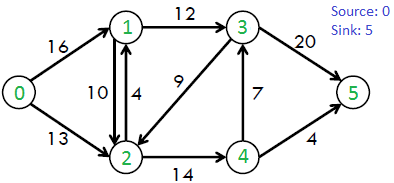

In [4]:
from IPython.display import Image
Image(filename='img/ford_fulkerson1.png')

Cada arco est√° etiquetado por una capacidad la cual representa el flujo m√°ximo que puede pasar del nodo $i$ al nodo $j$. El objetivo es encontrar la capacidad m√°xima de flujo que pasa del nodo origen (fuente) al nodo destino (sumidero). El flujo m√°ximo en esta red es 23.


A continuaci√≥n se muestran diferentes enfoques para resolver este problema de flujo m√°ximo:

**1. Aproximaci√≥n del Algoritmo Naive Greedy (puede que no produzca un resultado √≥ptimo o correcto)**

Esta aproximaci√≥n del problema del flujo m√°ximo comienza con el flujo total cero y produce flujos con un valor cada vez mayor. La forma natural de pasar de uno a otro es enviar m√°s flujo en alg√∫n camino de $s$ a $t$

C√≥mo funciona el enfoque Greedy para encontrar el flujo m√°ximo:


        E n√∫mero de arista
        f(e) flujo que se encuentra en la arista e.
        C(e) capacidad de la arista e.


                1) Inicializa : max_flow = 0  
                f(e) = 0 para cada arista e en E.
            
                2) Encontrar un camino de s a t (mientras exista).   
                   a) El camino existe si f(e) < C(e) para cada arista e en el camino. 
                   b) Si no se encuentra un camino, return max_flow.
                   c) Else encontrar el valor m√≠nimo para la ruta P
        
      // Nuestro flujo est√° limitado por el flujo que queda
    
      (i) flow = min(C(e)- f(e)) Para el camino P.
             max_flow += flow
      (ii) Para cada arista e del camino, incrementar el flujo
             f(e) += flow

                3) Return max_flow 


N√≥tese que la b√∫squeda de ruta solo necesita determinar si hay una ruta $s-t$ en el subgrafo de los bordes $e$ con $f(e) <C(e)$ por lo que no es costoso computacionalmente.

Veamos elsiguiente ejemplo:

In [7]:
Image(filename='img/ford_fulkerson2.png')

Existe un camino de s a t $s \rightarrow 1  \rightarrow 2  \rightarrow t$ con un flujo m√°ximo de 3 unidades (la ruta se muestra en color azul)

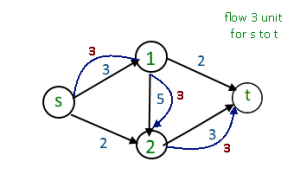

In [11]:
Image(filename='img/ford_fulkerson4.png')

La capacidad restante est√° representada por los n√∫meros de color verde.

In [12]:
Image(filename='img/ford_fulkerson5.png')

Para el gr√°fico anterior notamos que no existe un camino de $s \rightarrow t$, por lo que el flujo m√°ximo es de 3 unidades. Pero el flujo m√°ximo que sale del nodo origen es de 5 unidades, as√≠ como el flujo m√°ximo que llega al nodo destino.

Para superar este problema utilizamos el gr√°fico residual.

**2. Gr√°fico residual** 

La idea es extender el algoritmo mencionado anteriormente al permitir operaciones de "deshacer". Por ejemplo, desde el punto donde este algoritmo se atasca en la imagen de arriba, nos gustar√≠a enrutar dos unidades m√°s de flujo a lo largo del borde $(s, 2)$, luego hacia atr√°s a lo largo del borde $(1, 2)$, deshaciendo 2 de las 3 unidades enrutamos la iteraci√≥n anterior, y finalmente a lo largo del borde $(1, t)$


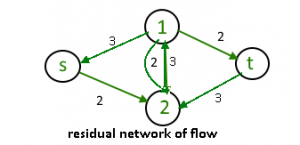

In [14]:
Image(filename='img/ford_fulkerson7.png')

Consideremos: 
* Arco inverso: $f (e)$
* Arco: $C (e) - f (e)$

Necesitamos una forma de especificar formalmente las operaciones de "deshacer" permitidas. Esto motiva la siguiente definici√≥n simple pero importante, de una red residual:

Dado un grafo $G$ y un flujo $f$ en √©l, formamos una nueva red de flujo $G_f$ que tiene el mismo conjunto de v√©rtices de $G$ y por cada arco de $G$ se crean dos nuevos arcos.

Por ejemplo, el arco $e = (1,2 )$ de $G$ lleva el flujo $f (e)$ y tiene capacidad $C (e)$ (para la imagen de arriba) genera un arco  de $G_f$ con capacidad $C (e) -f (e)$ (la capacidad restante) y un arco inverso $(2,1)$ de $G_f$ con capacidad $f (e)$ (la cantidad de flujo previamente encaminado que se puede deshacer). Ahora se tiene un camino de $s$ a $t$ con capacidad $f (e) <C (e)$ para todos los arcos.




La idea de utilizar gr√°ficos residuales para flujo m√°ximo se utiliza en el algoritmo de Ford-Fulkerson.


### Algoritmo Ford-Fulkerson

El algoritmo de Ford-Fulkerson propone buscar caminos en los que se pueda aumentar el flujo, hasta que se alcance el flujo m√°ximo. Su nombre viene dado por sus creadores, *L. R. Ford, Jr*. y *D. R. Fulkerson*

Sea $G(V,E)$ un grafo, con $V$ v√©rtices, $E$ aristas y donde por cada arista $(u,v)$, tenemos una capacidad $c(u,v)$ y un flujo $f(u,v)$. Se busca maximizar el valor del flujo desde una fuente $s$ hasta un sumidero $t$.

El m√©todo inicia con $f(u,v)=0$ para toda $(u,v) \in V)$. En cada iteraci√≥n, se incrementa el flujo en $G$ mediante el resultado de una b√∫squeda de un camino de aumento en una red.

El flujo a aumentar se debe considerar legal, es decir:

    El flujo de para toda arista $(u,v)$ no debe ser mayor que la capacidad de dicha arista. El flujo que sale de la fuente $s$ debe ser igual al que llega al sumidero $t$.

Nota: En una red con fuente $s$ y sumidero $t$ √∫nico el valor m√°ximo que puede tomar un flujo variable es igual a la capacidad m√≠nima que puede tomar un corte.

**Red residual**

Como se mencion√≥ anteriormente, definimos una red residual $ùê∫_f(V,E)$ como la red donde la capacidad de cada una de las aristas se define como $cf(u,v)= c(u,v)‚àíf(u,v)$ , donde $c(u,v)$ es la capacidad de la arista y el flujo $f(u,v)$ es el flujo de la arista $(u,v)$ en el camino de aumento seleccionado.

Intuitivamente, dado el grafo $G$ y un camino de aumento $c_F$, la red residual $G_f$ consiste en el grafo que representa el como cambia la capacidad de cada una de las aristas con respecto al flujo del camino de aumento $c_F$ en el grafo $G$.

**Caminos de aumento**

Un camino de aumento es un camino dirigido de la fuente $s$ al sumidero $t$ en $G_f$, donde la capacidad del camino de aumento es el m√≠nimo de las capacidades de sus aristas.

**Complejidad**

Al agregar un camino de aumento al flujo ya establecido en el gr√°fico, se alcanzar√° el flujo m√°ximo cuando no se puedan encontrar m√°s caminos de aumento de flujo en el gr√°fico. Sin embargo, no hay certeza de que esta situaci√≥n se llegue alguna vez, por lo que lo mejor que se puede garantizar es que la respuesta ser√° correcta si el algoritmo termina. En el caso de que el algoritmo se ejecute indefinidamente, es posible que el flujo ni siquiera converja hacia el flujo m√°ximo. Sin embargo, esta situaci√≥n solo ocurre con valores de flujo irracionales. 

Cuando las capacidades son n√∫meros enteros, el tiempo de ejecuci√≥n de Ford-Fulkerson est√° limitado por $O(E_f)$, donde $E$ es el n√∫mero de aristas en el gr√°fico y $f$ es el flujo m√°ximo en el gr√°fico. Esto se debe a que cada ruta de aumento se puede encontrar en el tiempo $O(E)$ y aumenta el flujo en una cantidad entera de al menos $1$, con el l√≠mite superior $f$.

**Pseudoc√≥digo**

      Ford-Fulkerson(G,s,t) {
      Gf = Crear_grafo_residual(G);
      for (cada arista (u,v) de E) {
          f[u,v]= 0;
      }
      while (exista un camino p desde s a t en la red residual Gf) {
          cf(p) = min{cf(u,v): (u,v) est√° sobre p};
          for (cada arista (u,v) en p) {
              f[u,v]= f[u,v] + cf(p);
              f[v,u]= f[v,u] - cf(p);
          }
          Actualizar_grafo_residual(Gf);
      }

    }


## 2. Desarrollo de ffmaxflow

c√≥digo original, documentaci√≥n, (le√≥n)


## 2. Desarrollo de ffmaxflow
c√≥digo original, documentaci√≥n, (le√≥n)

## 3. Reimplementaci√≥n de ffmaxflow
reimplementaci√≥n 1, reimplementaci√≥n 2, (dira)

## 4. Aplicaci√≥n a datos reales
resultado correcto, tiempo original vs C, (iv√°n)

## 5. Conclusiones

Existe el teorema de **cortadura m√≠nima** el cual consiste en generar una partici√≥n de los v√©rtices de una red de flujo en dos conjuntos, de modo que un conjunto incluye la fuente $s$ y el otro incluye el sumidero $t$. Por lo tanto, el flujo m√°ximo est√° limitado por la capacidad m√≠nima de corte.

El corte se define como la suma de las capacidades de los arcos desde el lado de la fuente hasta el lado del sumidero. El flujo m√°ximo tiene que ser igual a la capacidad del corte m√≠nimo.

Se puede encontrar un corte m√≠nimo despu√©s de realizar un c√°lculo de flujo m√°ximo utilizando el m√©todo Ford Fulkerson. Un posible corte m√≠nimo es el siguiente: el conjunto de todos los v√©rtices que se pueden alcanzar desde s en el gr√°fico residual (utilizando aristas con capacidad residual positiva), y el conjunto de todos los dem√°s v√©rtices.

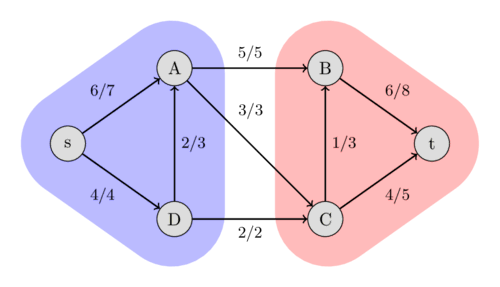

In [17]:
Image(filename='img/ford_fulkerson8.png')

## 6. Referecias

[Max Flow Problem Introduction](https://www.geeksforgeeks.org/max-flow-problem-introduction/)

[Documentaci√≥n de nuestro paquete](https://optimizacion-2-2021-1-gh-classroom.github.io/practica-2-segunda-parte-diramtz/maxflow.html)

[Cortadura m√≠nima](https://en.wikipedia.org/wiki/Max-flow_min-cut_theorem)